<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>EDA</font></h1>
<h4 align="center">September, 19_2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
import statistics as st

<div class="alert alert-danger" role="alert"> 
💾 Read Data

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<div class="alert alert-danger" role="alert"> 
🔎 Data visualize

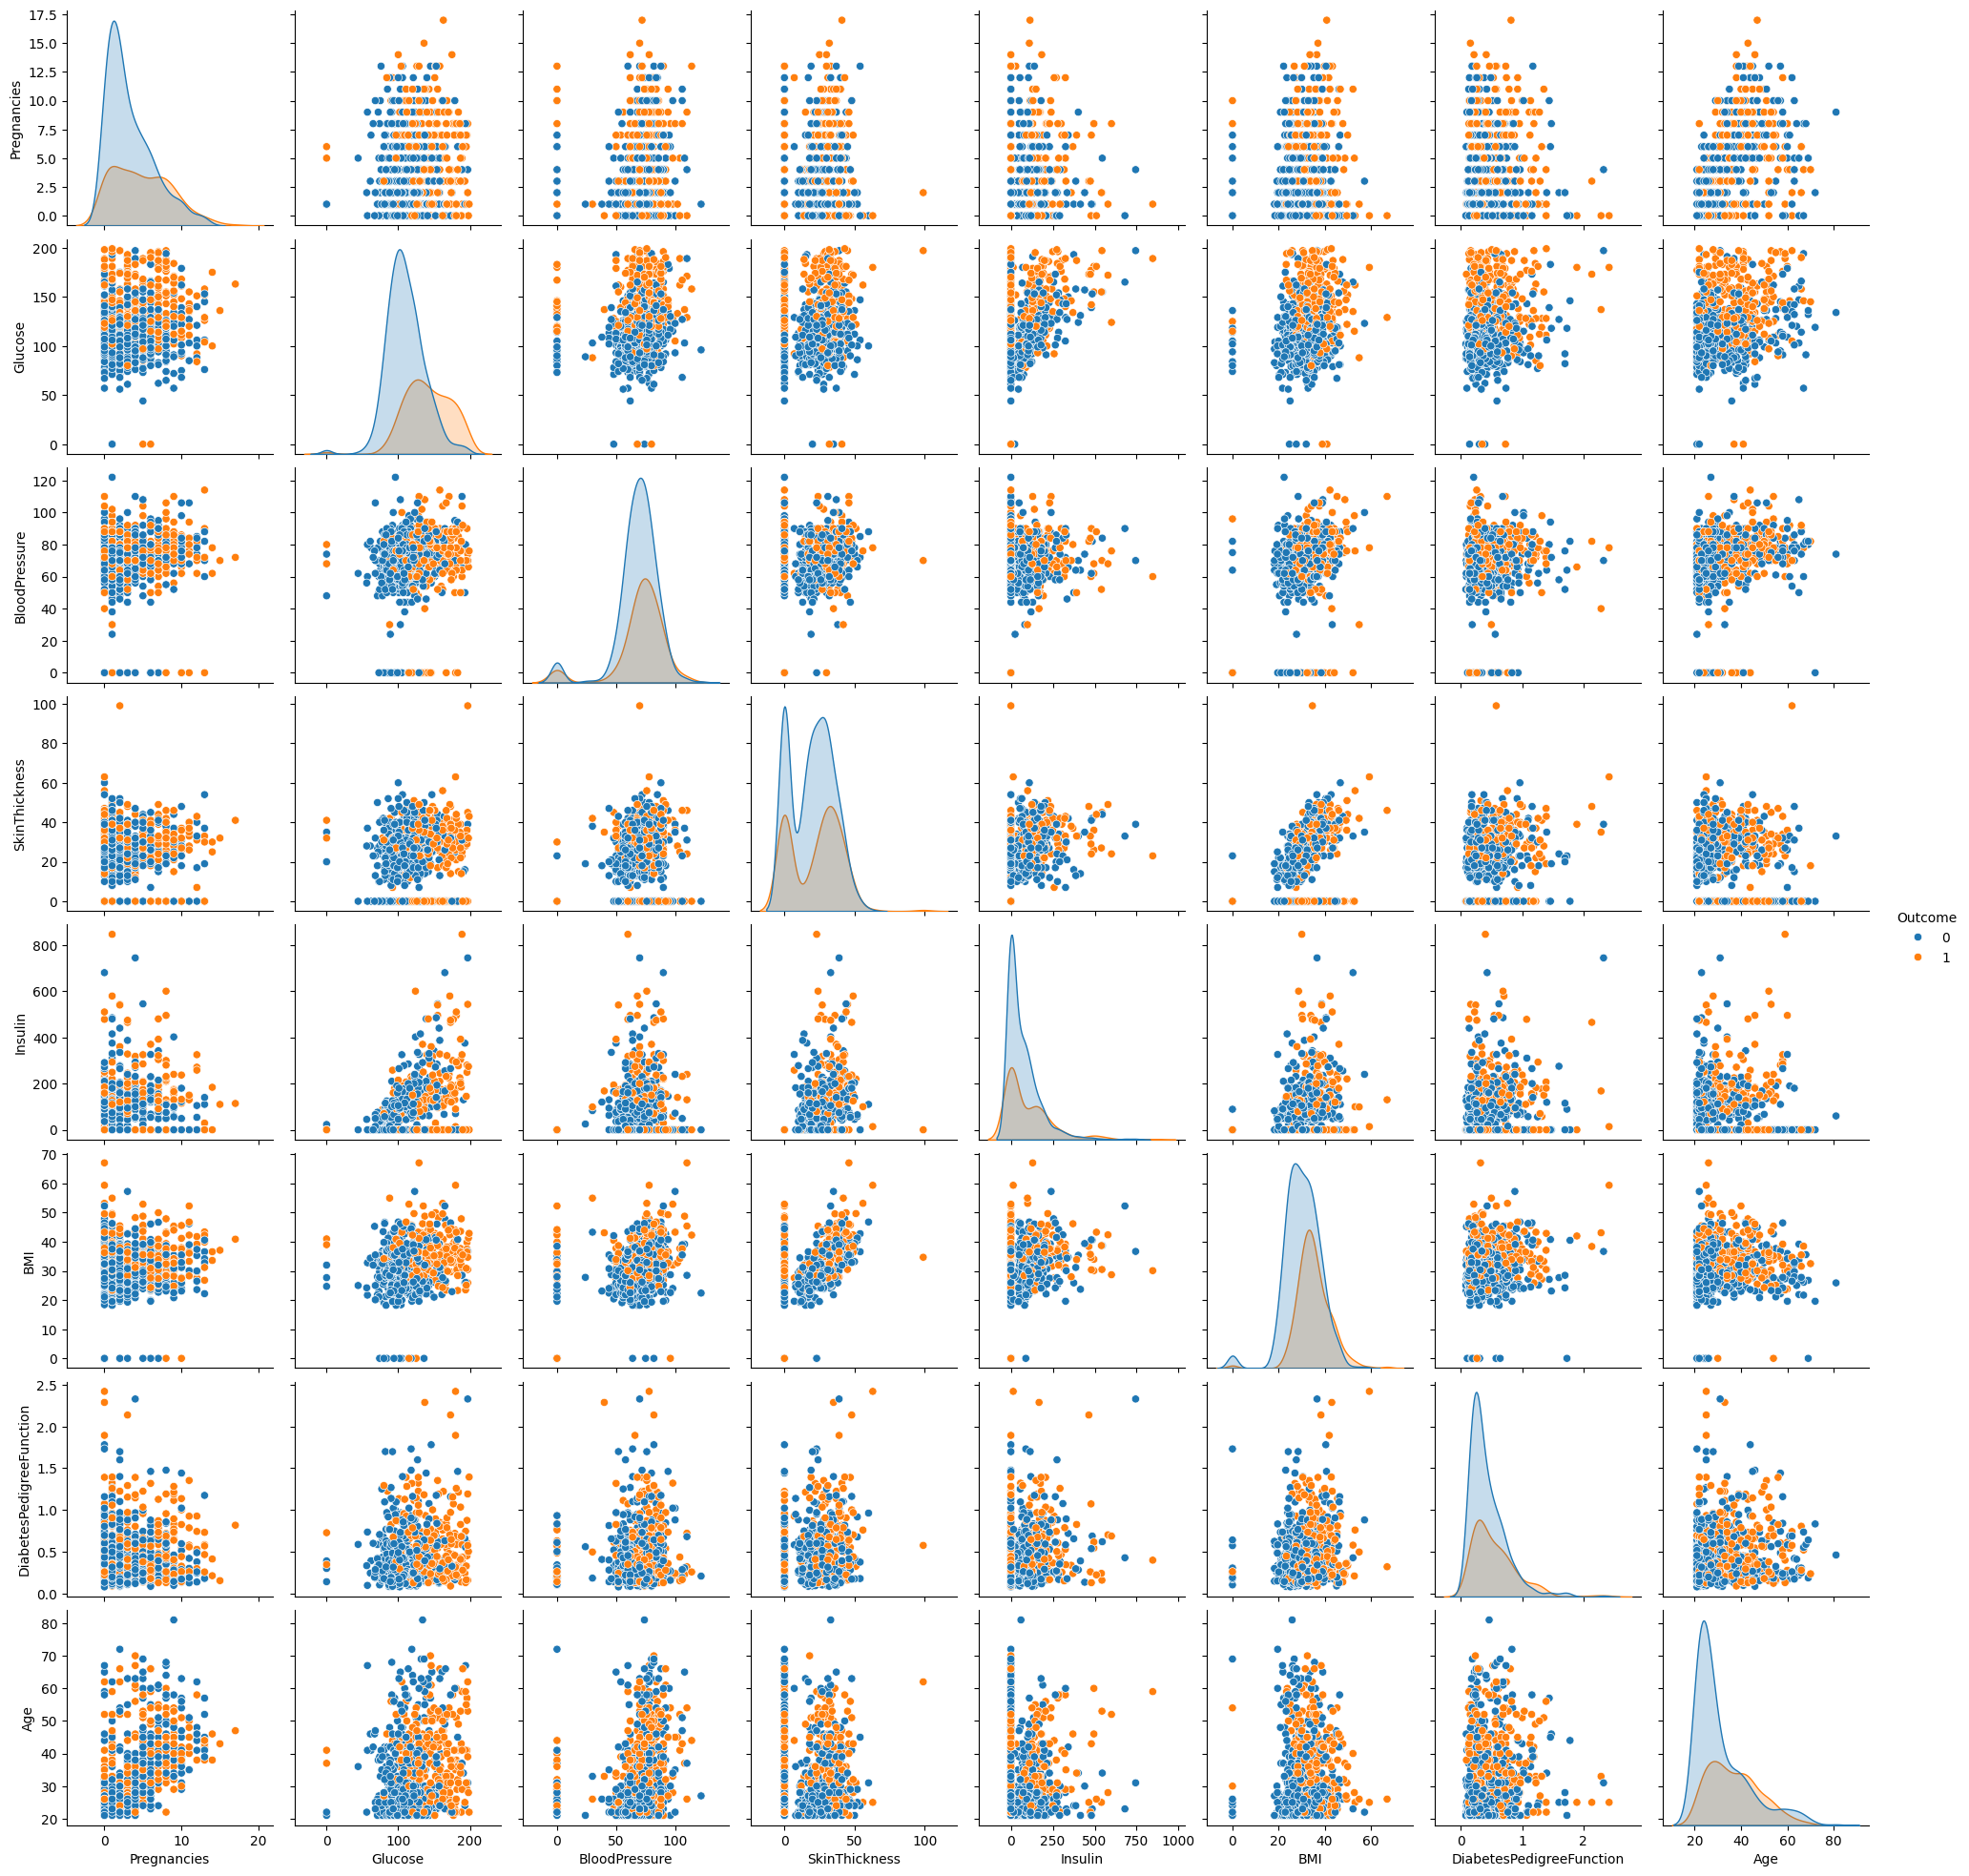

In [6]:
sns.pairplot(data=df,diag_kind='kde', hue='Outcome')

* **Glucose has the most impactamong all features then BMI then Age and ...**

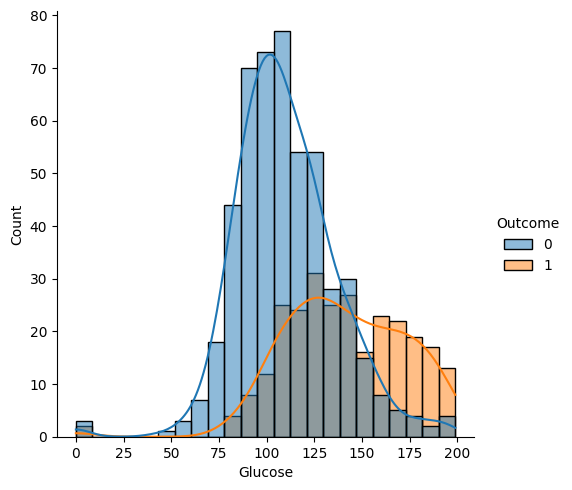

In [8]:
sns.displot(data=df,x='Glucose',kde='True', hue='Outcome')

In [9]:
print(f"the skewness of Glucose is : {round(df['Glucose'].skew(),3)}")

the skewness of Glucose is : 0.174


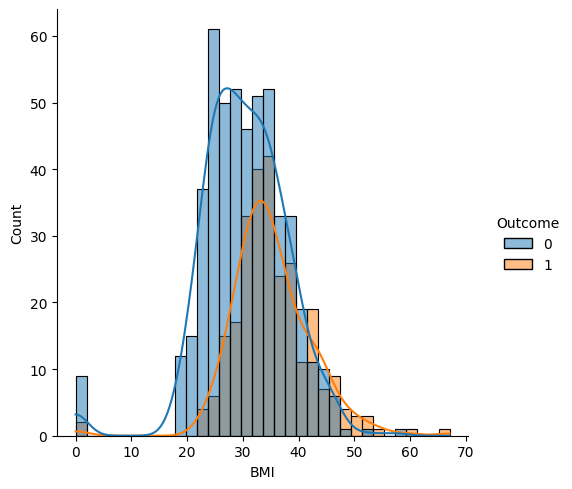

In [10]:
sns.displot(data=df,x='BMI',kde='True', hue='Outcome')

In [11]:
print(f"the skewness of BMI is : {round(df['BMI'].skew(),3)}")

the skewness of BMI is : -0.429


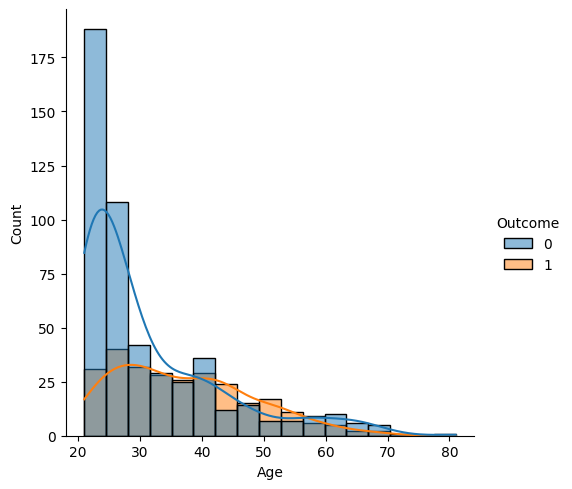

In [12]:
sns.displot(data=df,x='Age',kde='True', hue='Outcome')

In [13]:
print(f"the skewness of Age is : {round(df['Age'].skew(),3)}")

the skewness of Age is : 1.13


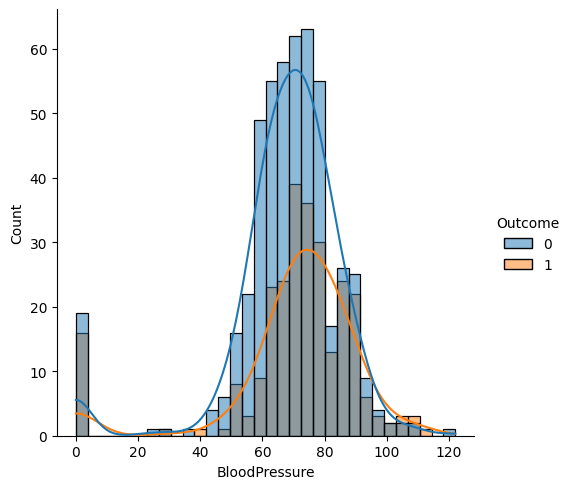

In [14]:
sns.displot(data=df,x='BloodPressure',kde='True', hue='Outcome')

In [15]:
print(f"the skewness of BloodPressure is : {round(df['BloodPressure'].skew(),3)}")

the skewness of BloodPressure is : -1.844


<div class="alert alert-danger" role="alert"> 
🔎 Data Cleaning

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* **Apparently we dont have null data**
* **but if we pay attention to this DataFrame it has outlier and null data for example for SkinThickness we have 0 value but in real the skin doesnt be zero , or any other value too or for insulin we have zero values** 

In [17]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

<div class="alert alert-danger" role="alert"> 
🔎 Remove outliers if our DataFrame has outliers

In [18]:
def OUTLIERS(df,TARGET,feature,T):
    
    Q1=df[df[TARGET]==T][feature].quantile(0.25)
    
    Q3=df[df[TARGET]==T][feature].quantile(0.75)
    
    IQR=Q3-Q1
    
    ub=(Q3 + (1.5*IQR))
    
    lu=(Q1 - (1.5*IQR))

    return ub,lu

In [19]:
def UPPERB(df,TARGET,feature):
    
    ubs=[]
    
    for T in range(len(df[TARGET].unique())):
        ubs.append(OUTLIERS(df,TARGET,feature,T)[0])
        
    return ubs

In [20]:
def LOWERB(df,TARGET,feature):
    
    lwb=[]
    
    for T in range(len(df[TARGET].unique())):
        lwb.append(OUTLIERS(df,TARGET,feature,T)[1])
        
    return lwb

In [21]:
def BOXPLOT(df,TARGET,feature):
    
    fig=plt.figure(figsize=(5,4))
    
    ax=fig.add_axes([0,0,1,1])
    
    sns.boxplot(ax=ax,data=df,x=TARGET,y=feature, hue=TARGET)
    
    y_u = UPPERB(df,TARGET,feature)
    y_l = LOWERB(df,TARGET,feature)
    ax.set_title(feature)
    ax.axhline(y=y_u[0],color='b',label='upper_0')
    ax.axhline(y=y_l[0],color='r',label='lower_0')
    ax.axhline(y=y_u[1],color='black',label='upper_1')
    ax.axhline(y=y_l[1],color='purple',label='lower_1')
    plt.legend()

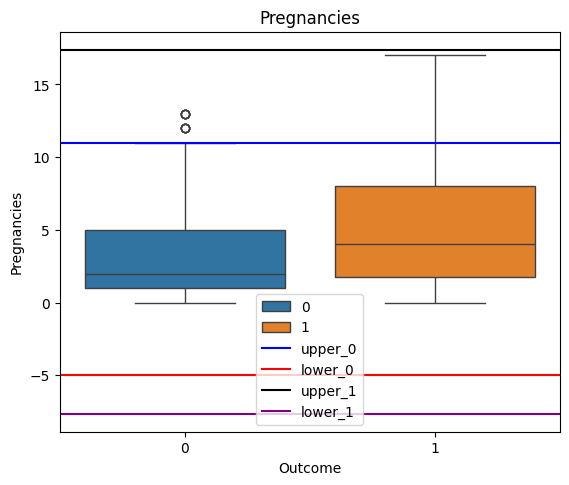

In [22]:
# outliers of 'Pregnancies' feature
BOXPLOT(df,'Outcome','Pregnancies')

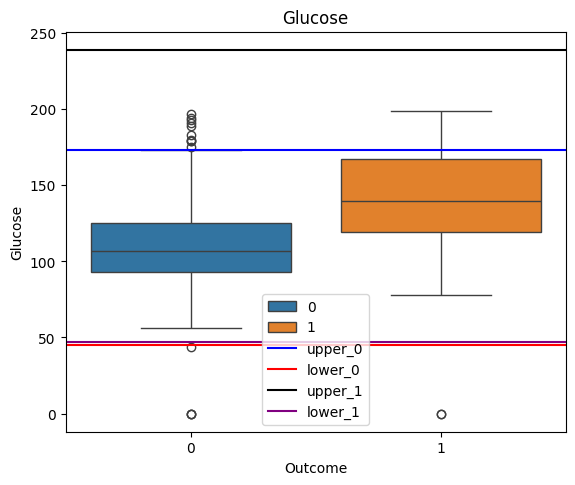

In [23]:
# outliers of 'Glucose' feature
BOXPLOT(df,'Outcome','Glucose')

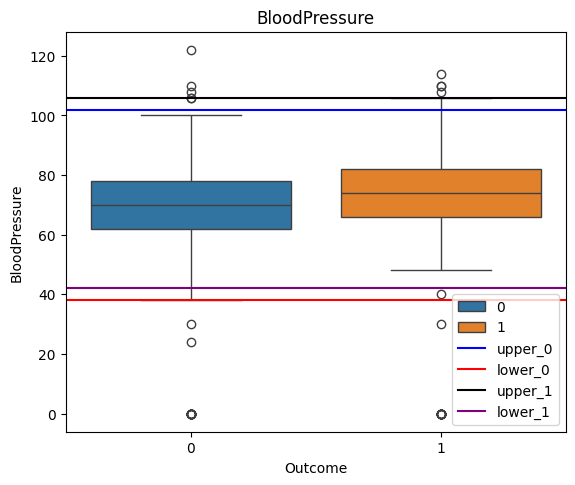

In [24]:
# outliers of 'BloodPressure' feature
BOXPLOT(df,'Outcome','BloodPressure')

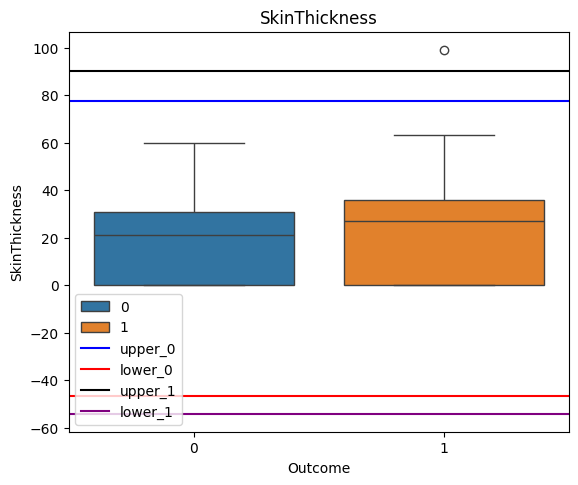

In [25]:
# outliers of 'SkinThickness' feature
BOXPLOT(df,'Outcome','SkinThickness')

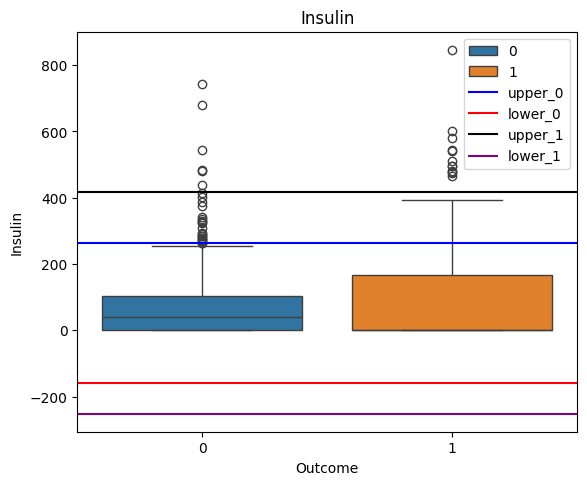

In [26]:
# outliers of 'Insulin' feature
BOXPLOT(df,'Outcome','Insulin')

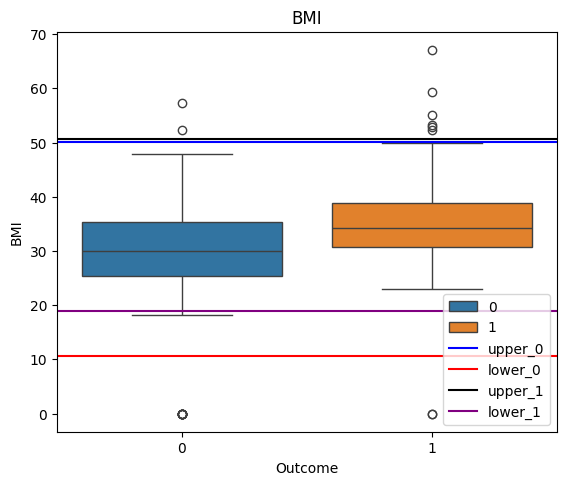

In [27]:
# outliers of 'BMI' feature
BOXPLOT(df,'Outcome','BMI')

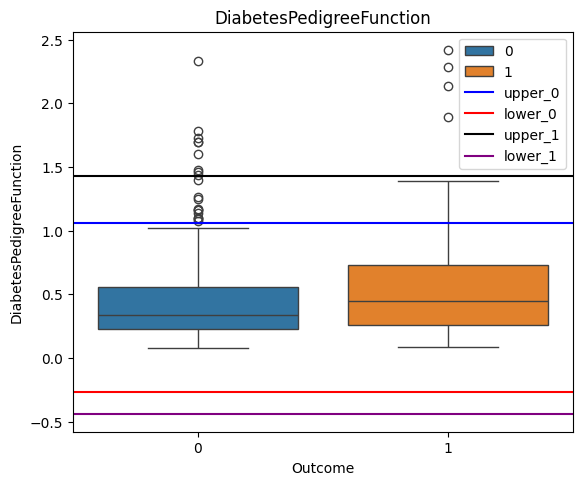

In [28]:
# outliers of 'DiabetesPedigreeFunction' feature
BOXPLOT(df,'Outcome','DiabetesPedigreeFunction')

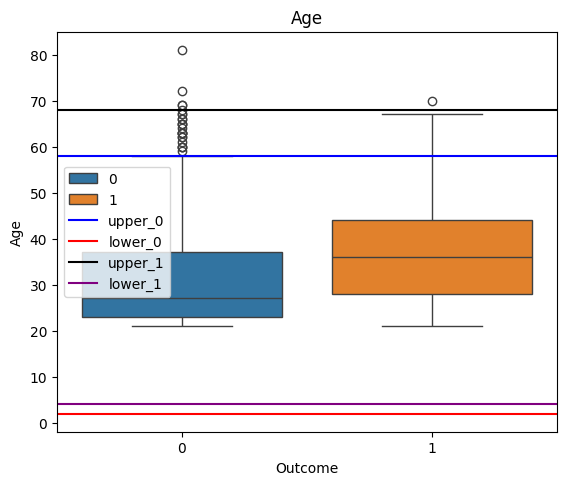

In [29]:
# outliers of 'Age' feature
BOXPLOT(df,'Outcome','Age')

<div class="alert alert-danger" role="alert"> 
🔎 Remove the outliers

In [30]:
def DROP_OUTLIERS(df,TARGET,feature):
    
    ubs=[]
    lws=[]
    
    ubs = UPPERB(df,TARGET,feature)
    lws = LOWERB(df,TARGET,feature)
    for T in range(len(df[TARGET].unique())):
        df = df.drop(index=df[df[TARGET]==T][feature][df[feature]>ubs[T]].index,axis=0)
        df = df.drop(index=df[df[TARGET]==T][feature][df[feature]<lws[T]].index,axis=0)
    return df

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df=DROP_OUTLIERS(df,'Outcome','Pregnancies')
df=DROP_OUTLIERS(df,'Outcome','Glucose')
df=DROP_OUTLIERS(df,'Outcome','BloodPressure')
df=DROP_OUTLIERS(df,'Outcome','SkinThickness')
df=DROP_OUTLIERS(df,'Outcome','Insulin')
df=DROP_OUTLIERS(df,'Outcome','BMI')
df=DROP_OUTLIERS(df,'Outcome','DiabetesPedigreeFunction')
df=DROP_OUTLIERS(df,'Outcome','Age')

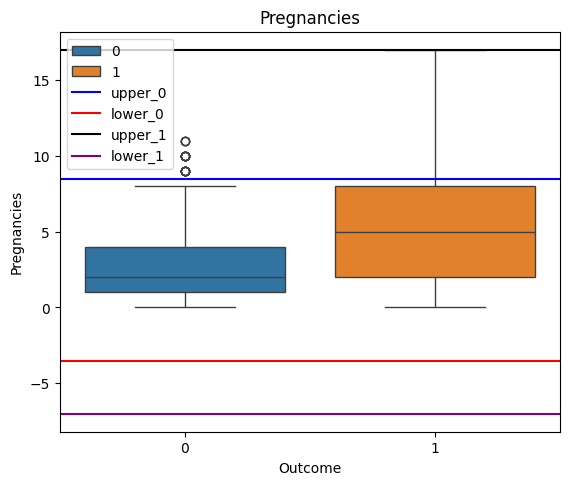

In [33]:
BOXPLOT(df,'Outcome','Pregnancies')

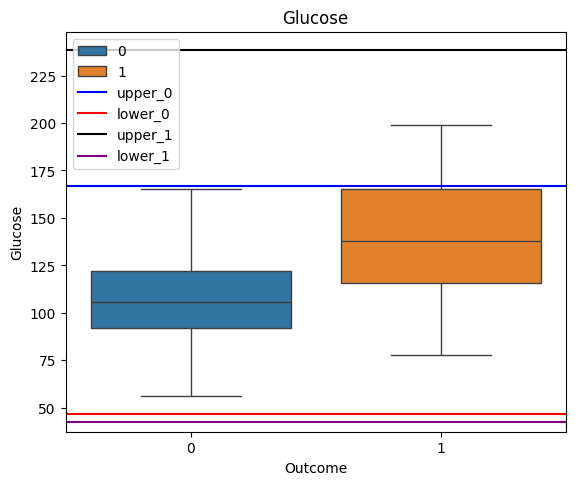

In [34]:
BOXPLOT(df,'Outcome','Glucose')

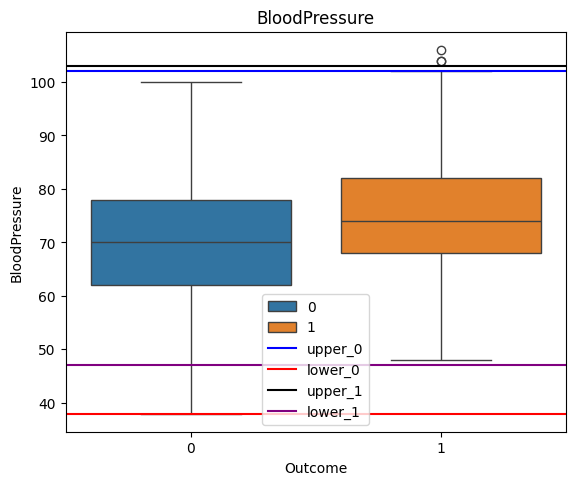

In [35]:
BOXPLOT(df,'Outcome','BloodPressure')

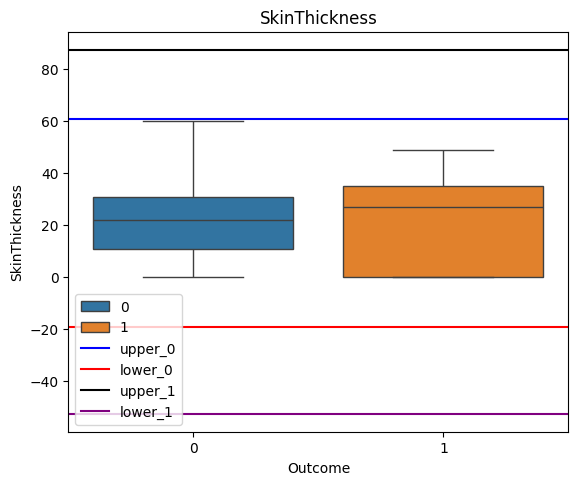

In [36]:
BOXPLOT(df,'Outcome','SkinThickness')

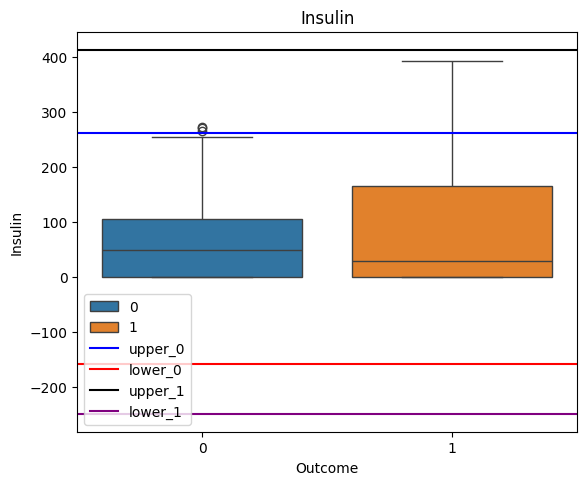

In [37]:
BOXPLOT(df,'Outcome','Insulin')

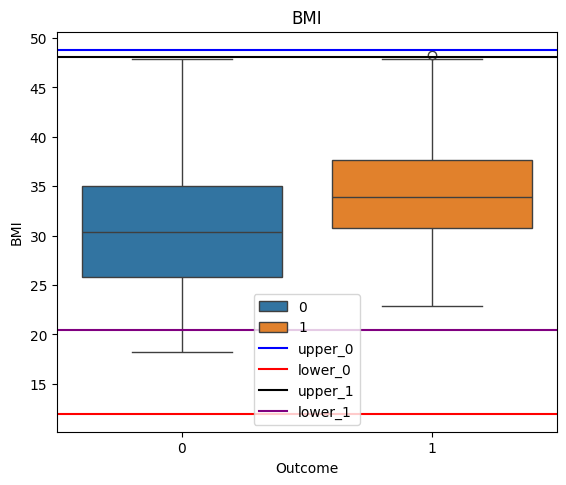

In [38]:
BOXPLOT(df,'Outcome','BMI')

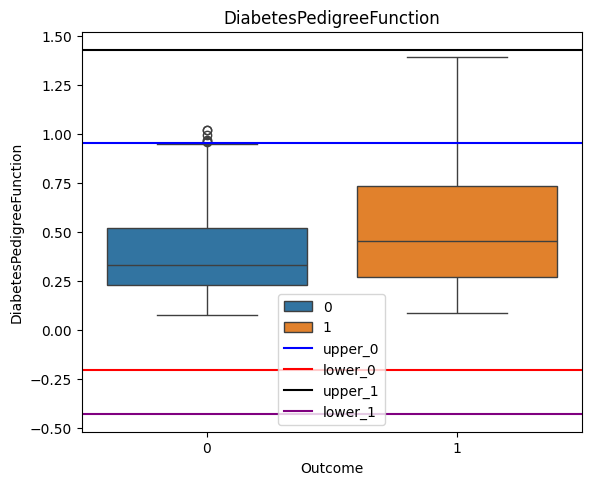

In [39]:
BOXPLOT(df,'Outcome','DiabetesPedigreeFunction')

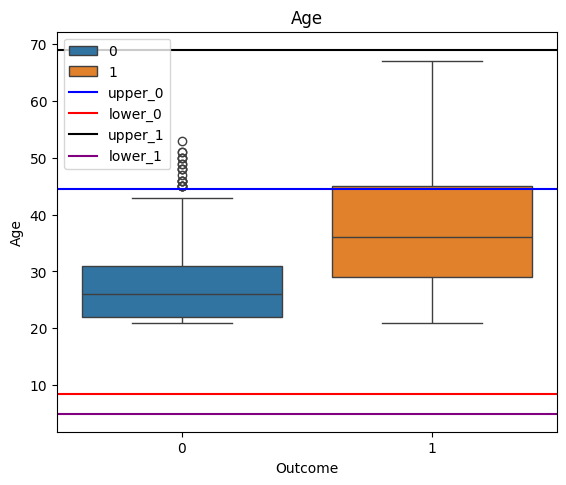

In [40]:
BOXPLOT(df,'Outcome','Age')

<div class="alert alert-danger" role="alert"> 
🔎 Missing value

* **Missing Values ====> fill the null data randomly instead of mean and knn**

* **in Pregnancies , Glucose , DiabetesPedigreeFunction , BloodPressure , BMI & Age we dont have null data**

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [42]:
df['SkinThickness'] = df['SkinThickness'].apply(lambda x:np.random.choice(df[df['SkinThickness']!=0.0]['SkinThickness']) if x==0.0 else x)

In [43]:
df['Insulin'] = df['Insulin'].apply(lambda x:np.random.choice(df[df['Insulin']!=0.0]['Insulin']) if x==0.0 else x)

<div class="alert alert-danger" role="alert"> 
🔎 take Histogram of all features

<Axes: xlabel='Pregnancies', ylabel='Count'>

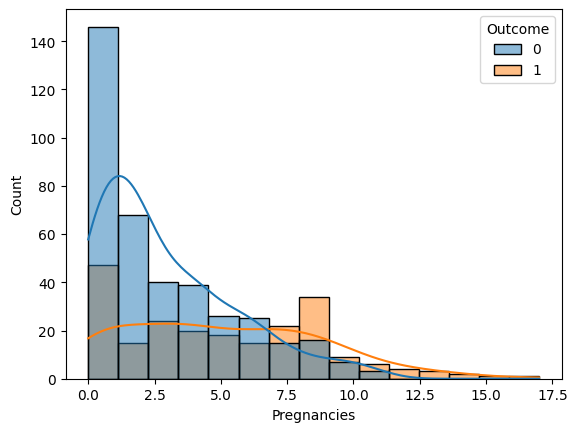

In [44]:
sns.histplot(data=df,x='Pregnancies',kde=True, hue="Outcome")

<Axes: xlabel='Glucose', ylabel='Count'>

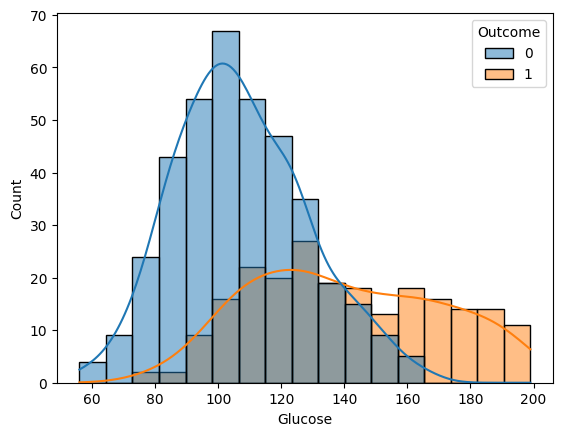

In [45]:
sns.histplot(data=df,x='Glucose',kde=True, hue="Outcome")

<Axes: xlabel='BloodPressure', ylabel='Count'>

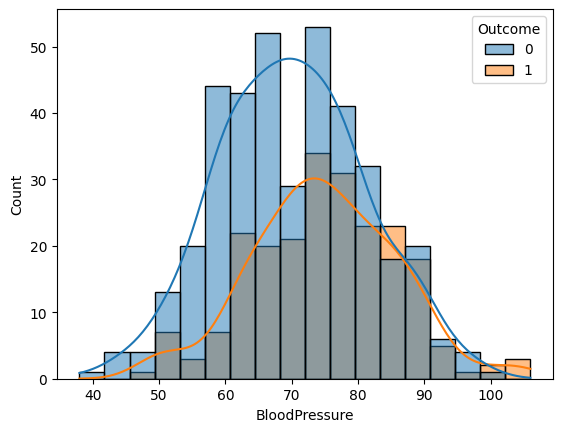

In [46]:
sns.histplot(data=df,x='BloodPressure',kde=True, hue="Outcome")

<Axes: xlabel='SkinThickness', ylabel='Count'>

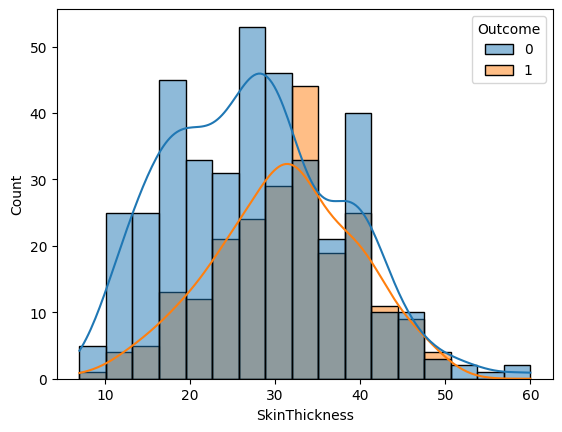

In [47]:
sns.histplot(data=df,x='SkinThickness',kde=True, hue="Outcome")

<Axes: xlabel='Insulin', ylabel='Count'>

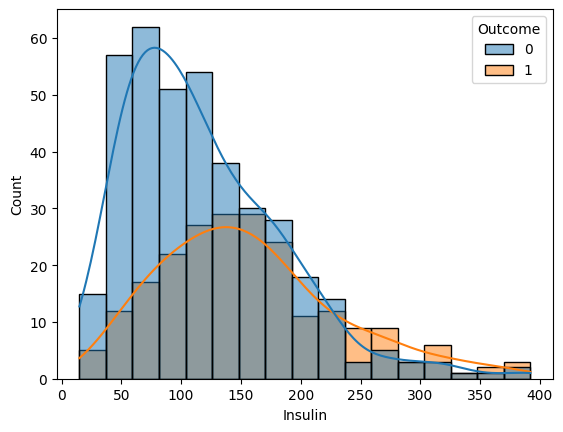

In [48]:
sns.histplot(data=df,x='Insulin',kde=True, hue="Outcome")

<Axes: xlabel='BMI', ylabel='Count'>

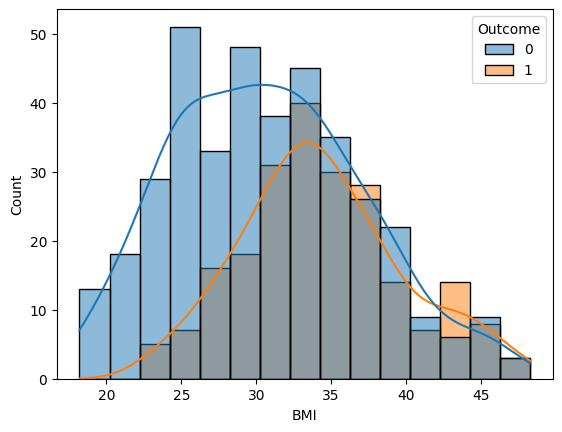

In [49]:
sns.histplot(data=df,x='BMI',kde=True, hue="Outcome")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

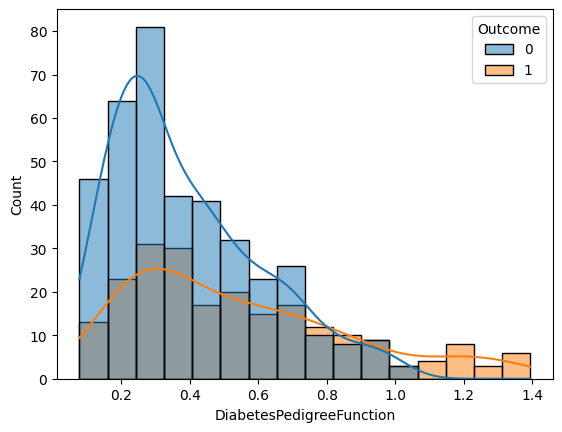

In [50]:
sns.histplot(data=df,x='DiabetesPedigreeFunction',kde=True, hue="Outcome")

<Axes: xlabel='Age', ylabel='Count'>

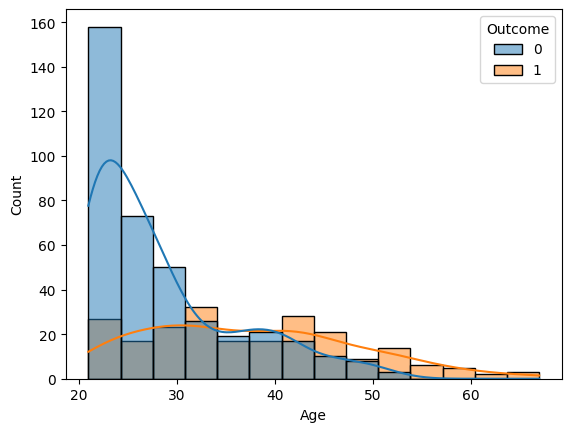

In [51]:
sns.histplot(data=df,x='Age',kde=True, hue="Outcome")

<div class="alert alert-danger" role="alert"> 
🔎 Statistics

* **a_mean**

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,215,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,24,130,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,12,168,25.6,0.201,30,0


In [53]:
print(f"mean of Pregnancies is : {st.mean(df['Pregnancies'])}")
print(f"mean of Glucose is : {st.mean(df['Glucose'])}")
print(f"mean of BloodPressure is : {st.mean(df['BloodPressure'])}")
print(f"mean of SkinThickness is : {st.mean(df['SkinThickness'])}")
print(f"mean of Insulin is : {st.mean(df['Insulin'])}")
print(f"mean of BMI is : {st.mean(df['BMI'])}")
print(f"mean of DiabetesPedigreeFunction is : {st.mean(df['DiabetesPedigreeFunction'])}")
print(f"mean of Age is : {st.mean(df['Age'])}")

mean of Pregnancies is : 3.717821782178218
mean of Glucose is : 119.39438943894389
mean of BloodPressure is : 71.83828382838284
mean of SkinThickness is : 28.783828382838283
mean of Insulin is : 132.02310231023102
mean of BMI is : 32.08366336633664
mean of DiabetesPedigreeFunction is : 0.44611056105610564
mean of Age is : 31.646864686468646


* **b_median**

In [54]:
print(f"median of Pregnancies is : {st.median(df['Pregnancies'])}")
print(f"median of Glucose is : {st.median(df['Glucose'])}")
print(f"median of BloodPressure is : {st.median(df['BloodPressure'])}")
print(f"median of SkinThickness is : {st.median(df['SkinThickness'])}")
print(f"median of Insulin is : {st.median(df['Insulin'])}")
print(f"median of BMI is : {st.median(df['BMI'])}")
print(f"median of DiabetesPedigreeFunction is : {st.median(df['DiabetesPedigreeFunction'])}")
print(f"median of Age is : {st.median(df['Age'])}")

median of Pregnancies is : 3.0
median of Glucose is : 114.0
median of BloodPressure is : 72.0
median of SkinThickness is : 29.0
median of Insulin is : 120.0
median of BMI is : 32.0
median of DiabetesPedigreeFunction is : 0.3725
median of Age is : 28.0


* **c_mode**

In [55]:
print(f"mode of Pregnancies is : {st.mode(df['Pregnancies'])}")
print(f"mode of Glucose is : {st.mode(df['Glucose'])}")
print(f"mode of BloodPressure is : {st.mode(df['BloodPressure'])}")
print(f"mode of SkinThickness is : {st.mode(df['SkinThickness'])}")
print(f"mode of Insulin is : {st.mode(df['Insulin'])}")
print(f"mode of BMI is : {st.mode(df['BMI'])}")
print(f"mode of DiabetesPedigreeFunction is : {st.mode(df['DiabetesPedigreeFunction'])}")
print(f"mode of Age is : {st.mode(df['Age'])}")

mode of Pregnancies is : 1
mode of Glucose is : 99
mode of BloodPressure is : 70
mode of SkinThickness is : 32
mode of Insulin is : 140
mode of BMI is : 31.6
mode of DiabetesPedigreeFunction is : 0.254
mode of Age is : 22


* **d_variance**

In [56]:
print(f"variance of Pregnancies is : {st.variance(df['Pregnancies'])}")
print(f"variance of Glucose is : {st.variance(df['Glucose'])}")
print(f"variance of BloodPressure is : {st.variance(df['BloodPressure'])}")
print(f"variance of SkinThickness is : {st.variance(df['SkinThickness'])}")
print(f"variance of Insulin is : {st.variance(df['Insulin'])}")
print(f"variance of BMI is : {st.variance(df['BMI'])}")
print(f"variance of DiabetesPedigreeFunction is : {st.variance(df['DiabetesPedigreeFunction'])}")
print(f"variance of Age is : {st.variance(df['Age'])}")

variance of Pregnancies is : 10.288838883888388
variance of Glucose is : 868.2491585522189
variance of BloodPressure is : 126.32091209120912
variance of SkinThickness is : 91.15484548454846
variance of Insulin is : 5208.201118293648
variance of BMI is : 39.0967078798789
variance of DiabetesPedigreeFunction is : 0.07351005883042849
variance of Age is : 96.30484139323023


* **e_std**

In [57]:
print(f"stdev of Pregnancies is : {st.stdev(df['Pregnancies'])}")
print(f"stdev of Glucose is : {st.stdev(df['Glucose'])}")
print(f"stdev of BloodPressure is : {st.stdev(df['BloodPressure'])}")
print(f"stdev of SkinThickness is : {st.stdev(df['SkinThickness'])}")
print(f"stdev of Insulin is : {st.stdev(df['Insulin'])}")
print(f"stdev of BMI is : {st.stdev(df['BMI'])}")
print(f"stdev of DiabetesPedigreeFunction is : {st.stdev(df['DiabetesPedigreeFunction'])}")
print(f"stdev of Age is : {st.stdev(df['Age'])}")

stdev of Pregnancies is : 3.2076219982860183
stdev of Glucose is : 29.466067918068383
stdev of BloodPressure is : 11.239257630787236
stdev of SkinThickness is : 9.547504673188092
stdev of Insulin is : 72.16786763022479
stdev of BMI is : 6.252736031520834
stdev of DiabetesPedigreeFunction is : 0.27112738487734594
stdev of Age is : 9.813503013360226


* **f_corr_matrix**

<Axes: >

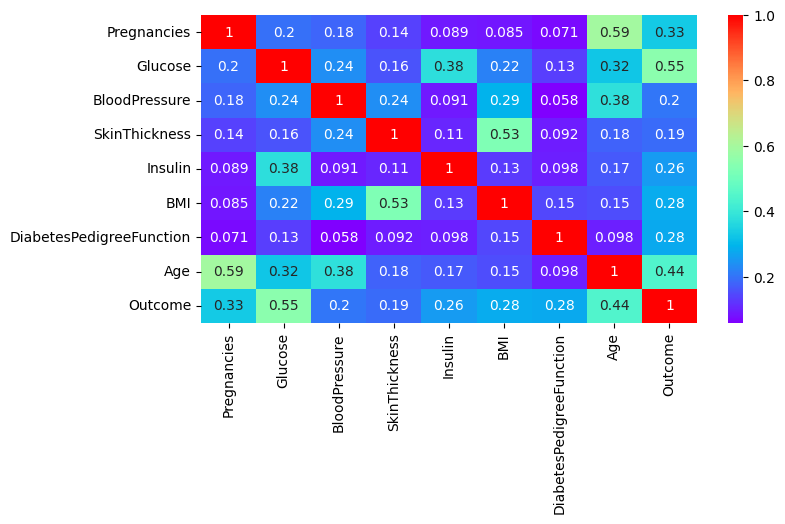

In [58]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow)

* **g_skewness_Plot**

In [59]:
skewness = df.skew()

Text(0.5, 1.0, 'Skewness')

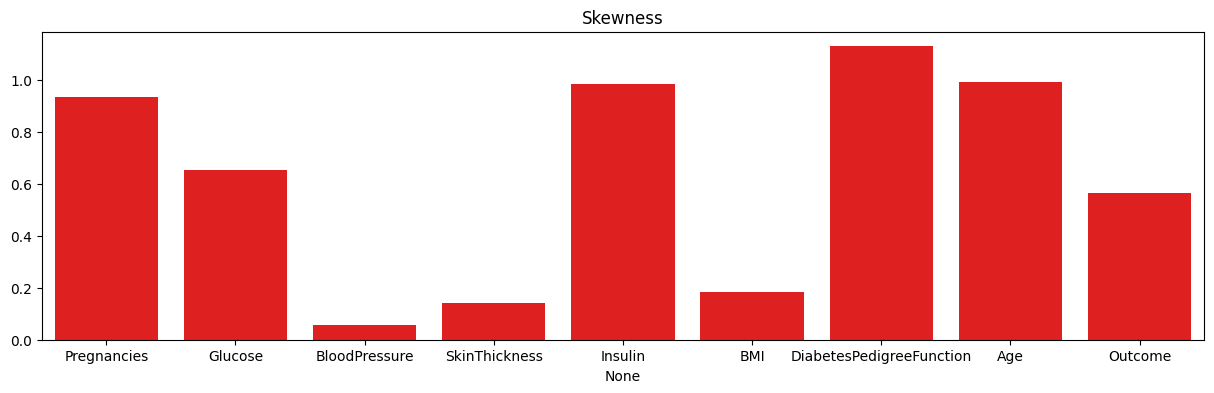

In [67]:
# Skewness plot
fig = plt.figure(figsize=(15,4))
sns.barplot(x=skewness.index, y=skewness.values, color='r')
plt.title('Skewness')

* **h_kurtosis_Plot**

In [68]:
kurtosis = df.kurtosis()

Text(0.5, 1.0, 'Kurtosis')

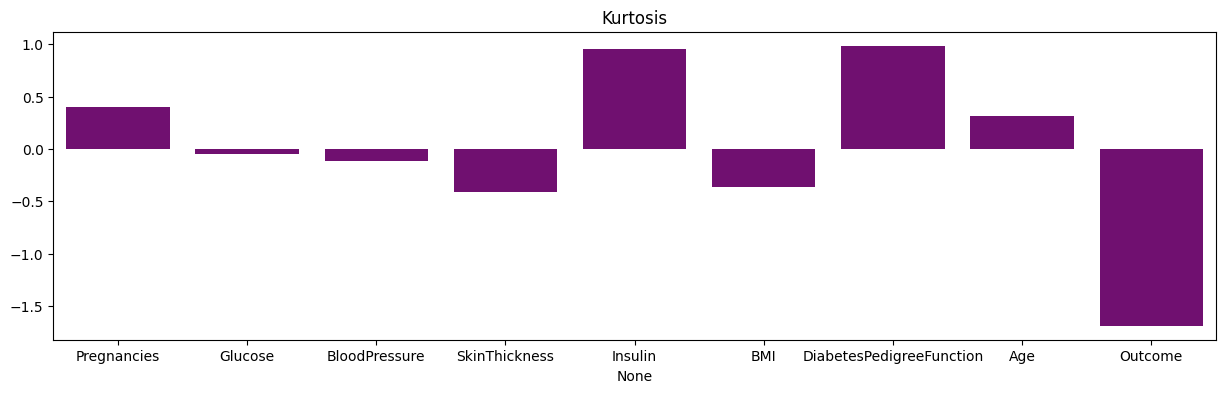

In [69]:
fig = plt.figure(figsize=(15,4))
sns.barplot(x=kurtosis.index, y=kurtosis.values, color='purple')
plt.title('Kurtosis')

* **i_range_of_data**

In [70]:
data_range = df.max() - df.min()

Text(0.5, 1.0, 'Range')

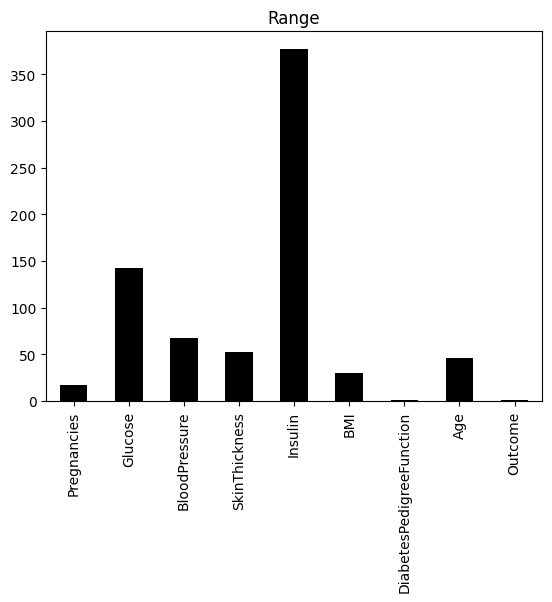

In [71]:
data_range.plot(kind='bar',color='k')
plt.title('Range')

* **j_IQR_plot**

In [72]:
iqr = df.quantile(0.75) - df.quantile(0.25)

Text(0.5, 1.0, 'Interquartile Range')

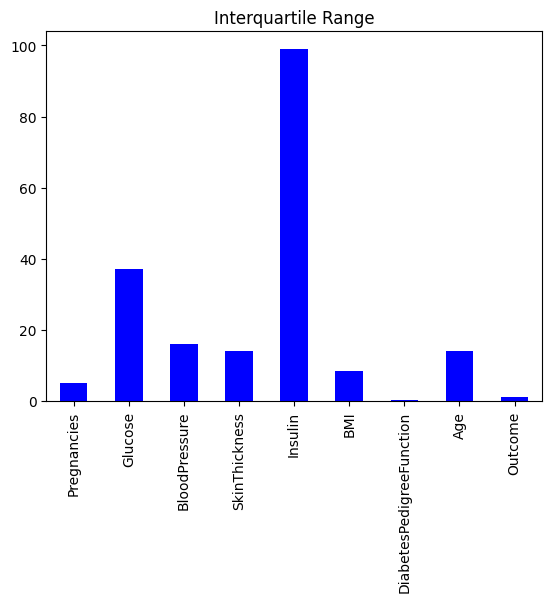

In [73]:
iqr.plot(kind='bar',color='b')
plt.title('Interquartile Range')

In [ ]:
# Armin Amany